In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [2]:
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [3]:
data.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data_sex_survived = data[["Sex","Survived"]].copy()

data_sex_survived.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [5]:
data_sex_survived["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [6]:
data_sex_survived["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
sex_counts = data_sex_survived["Sex"].value_counts()
sex_counts

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
# Group the data by 'Sex' and count the survivors in each group
survival_counts = data_sex_survived.groupby('Sex')['Survived'].sum()
survival_counts

Sex
female    233
male      109
Name: Survived, dtype: int64

In [9]:
survival_rates = survival_counts/sex_counts
survival_rates

Sex
female    0.742038
male      0.188908
dtype: float64

<Axes: title={'center': 'Survival Rate by Sex'}, xlabel='Count of Survived', ylabel='Sex'>

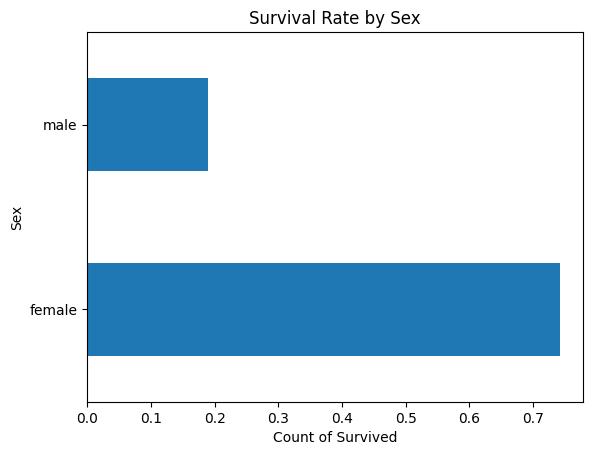

In [10]:
# Create a bar plot
survival_rates.plot(kind='barh', xlabel='Count of Survived', ylabel='Sex', title='Survival Rate by Sex')


In [11]:
## Create function that will "predict" if survived or not


def f(x):
    if x == "male":
        prediction = 0
    else:
        prediction = 1
    return prediction
    

data_sex_survived["Prediction"] = data_sex_survived["Sex"].apply(lambda x: f(x))


In [12]:
data_sex_survived

,Sex,Survived,Prediction
0,male,0,0
1,female,1,1
2,female,1,1
3,female,1,1
4,male,0,0
...,...,...,...
886,male,0,0
887,female,1,1
888,female,0,1
889,male,1,0


In [13]:
cm = confusion_matrix(data_sex_survived["Survived"],data_sex_survived["Prediction"])
cm

array([[468,  81],
       [109, 233]])

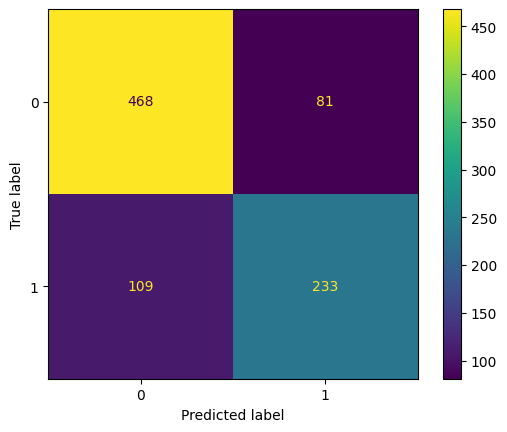

In [14]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


In [15]:
print(classification_report(data_sex_survived["Survived"],data_sex_survived["Prediction"]))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

